C:\Users\mhmda\AppData\Local\Temp\ipykernel_17664\1776606884.py:13: DtypeWarning: Columns (0,1,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_a = pd.read_csv('Crocodile_Survey_Data_2021_22.csv')


<Axes: >

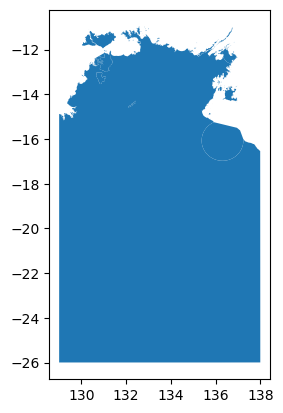

In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
from shapely.geometry import Point, Polygon
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Load the zone data (polygons) into a GeoDataFrame
zone_data = gpd.read_file("NT_Croc_Capture_Zones.shx")
zone_data = zone_data.rename(columns={"ZONENAME": "ZONE_NAME"})  # Rename the column for clarity

# Step 2: Load the crocodile survey data into a DataFrame
df_a = pd.read_csv('Crocodile_Survey_Data_2021_22.csv')

# Step 3: Convert Latitude and Longitude in df_a into Points and create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_a['Longitude'], df_a['Latitude__'])]
gdf_b = gpd.GeoDataFrame(df_a, geometry=geometry)

# Step 4: Perform a spatial join to determine which zone each point falls into
gdf_b_with_zone = gpd.sjoin(gdf_b, zone_data, how="left", predicate='within')

# Step 5: Save the resulting GeoDataFrame with zone information as a CSV file
gdf_b_with_zone.to_csv('captured_points_with_zones.csv', index=False)

zone_data.plot()


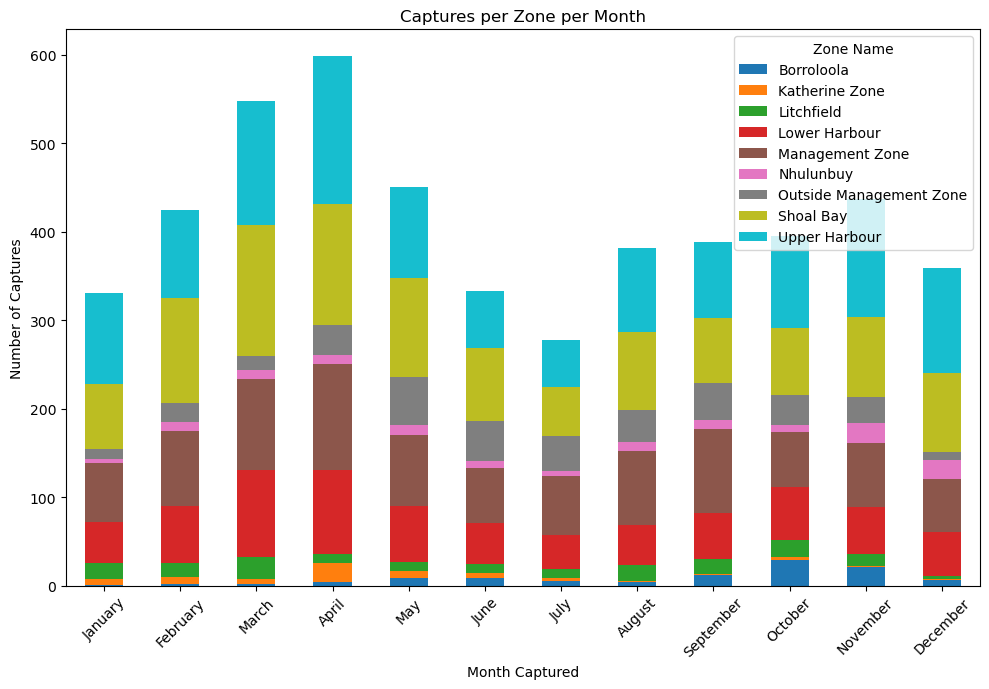

In [4]:

df = pd.read_csv('NT Crocodile Capture.csv')

# Convert 'DATE_CAPTURED' to datetime format
df['DATE_CAPTURED'] = pd.to_datetime(df['DATE_CAPTURED'])

# Extract the month from 'DATE_CAPTURED' and create a new column 'MONTH_CAPTURED'
df['MONTH_CAPTURED'] = df['DATE_CAPTURED'].dt.month_name()



# Group by 'ZONE_NAME' and 'MONTH_CAPTURED' and count the number of captures
captures_per_zone_month = df.groupby(['ZONE_NAME', 'MONTH_CAPTURED']).size().reset_index(name='CAPTURE_COUNT')

# Save the result to a new CSV file
captures_per_zone_month.to_csv('captures_per_zone_month.csv', index=False)

# Load the data from the CSV
df = pd.read_csv('captures_per_zone_month.csv')

# Pivot the data to get months as columns and zones as rows
pivot_table = df.pivot_table(index='MONTH_CAPTURED', columns='ZONE_NAME', values='CAPTURE_COUNT', aggfunc='sum').fillna(0)

# Sort months if needed (assuming the data includes all months)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(month_order)

# Create a stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab10')

# Add title and labels
plt.title('Captures per Zone per Month')
plt.xlabel('Month Captured')
plt.ylabel('Number of Captures')

# Add legend with title
plt.legend(title='Zone Name')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()




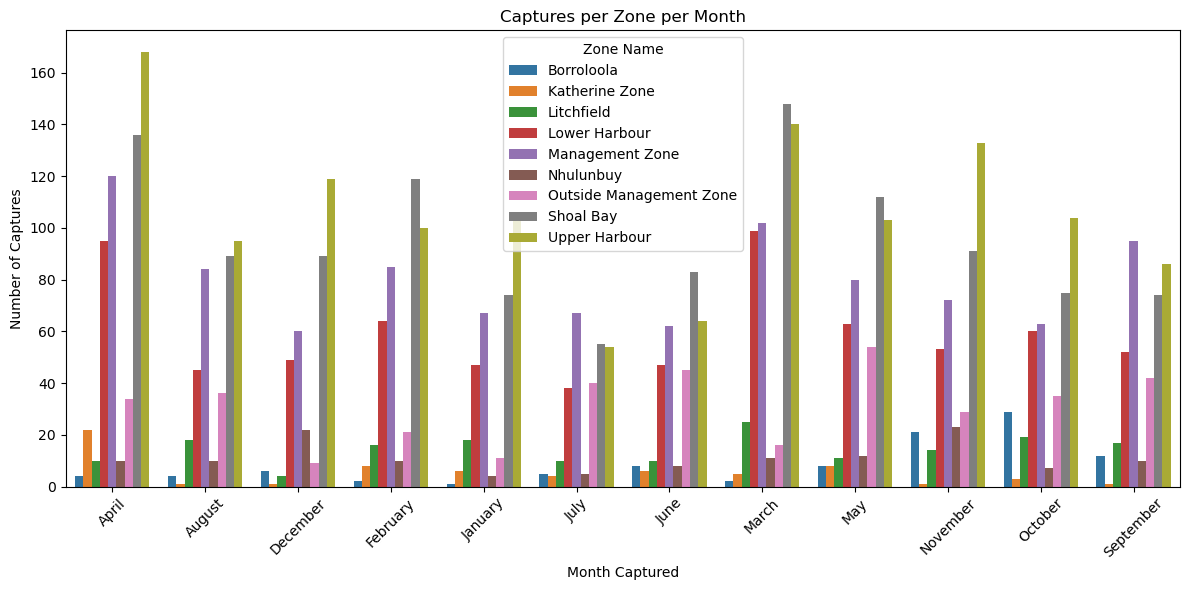

In [5]:


# Assuming 'captures_per_zone_month.csv' is the file created in the previous step
df = pd.read_csv('captures_per_zone_month.csv')

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='MONTH_CAPTURED', y='CAPTURE_COUNT', hue='ZONE_NAME', data=df)

plt.title('Captures per Zone per Month')
plt.xlabel('Month Captured')
plt.ylabel('Number of Captures')
plt.legend(title='Zone Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
